# Name: Shalini Banerjee
# Reg No.: 21MIA1022

# Lab Task 1: Setup and Basic Extraction

### **Objective**: Install the necessary tools and libraries, and extract frame information from a video.

### Steps:
#### 1.	Install ffmpeg and ffmpeg-python:
#### o	Install the ffmpeg tool and the ffmpeg-python library.

In [12]:
#pip install ffmpeg-python
import ffmpeg

#### 2.	Extract Frame Information:
#### o	Extract frame information from a sample video.

In [49]:
def extract_frame_info(video_path):
    try:
        # Getting the video information
        probe = ffmpeg.probe(video_path)
        video_info = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')
        # Extracting the frame rate, the number of frames, duration, width, and height
        frame_rate = eval(video_info['r_frame_rate'])
        num_frames = int(video_info['nb_frames'])
        duration = float(video_info['duration'])
        width = int(video_info['width'])
        height = int(video_info['height'])
        print(f"Frame Rate: {frame_rate} fps")
        print(f"Number of Frames: {num_frames}")
        print(f"Duration: {duration} seconds")
        print(f"Resolution: {width}x{height}")
        return {
            "frame_rate": frame_rate,
            "num_frames": num_frames,
            "duration": duration,
            "resolution": (width, height)
        }
    except ffmpeg.Error as e:
        print("An error occurred while processing the video:", e.stderr.decode())
        return None
        
# Extracting the frame information
frame_info = extract_frame_info(r"D:\college - sem 7\iva\videoplayback.mp4")
if frame_info:
    print("Frame Information extracted successfully.")

Frame Rate: 29.97002997002997 fps
Number of Frames: 1109
Duration: 37.003633 seconds
Resolution: 640x360
Frame Information extracted successfully.


# Lab Task 2: Frame Type Analysis

### **Objective**: Analyze the extracted frame information to understand the distribution of I, P, and B frames in a video.

### Steps:
#### 1.	Modify the Script:
#### o	Count the number of I, P, and B frames.
#### o	Calculate the percentage of each frame type in the video.

In [55]:
import ffmpeg
import re

def count_frames(video_path):
    # Run ffmpeg command to get frame types
    result = ffmpeg.probe(video_path, select_streams='v', show_frames=None)
    frames = result['frames']

    # Initialize counters
    i_frames = 0
    p_frames = 0
    b_frames = 0

    # Count frames
    for frame in frames:
        if frame['pict_type'] == 'I':
            i_frames += 1
        elif frame['pict_type'] == 'P':
            p_frames += 1
        elif frame['pict_type'] == 'B':
            b_frames += 1

    # Calculate total frames and percentages
    total_frames = i_frames + p_frames + b_frames
    i_percentage = (i_frames / total_frames) * 100
    p_percentage = (p_frames / total_frames) * 100
    b_percentage = (b_frames / total_frames) * 100

    return {
        'I_frames': i_frames,
        'P_frames': p_frames,
        'B_frames': b_frames,
        'I_percentage': i_percentage,
        'P_percentage': p_percentage,
        'B_percentage': b_percentage
    }

# Path to your video file
video_path = r"D:\college - sem 7\iva\videoplayback.mp4"

# Get frame count and percentages
frame_info = count_frames(video_path)
print(frame_info)


{'I_frames': 9, 'P_frames': 1100, 'B_frames': 0, 'I_percentage': 0.8115419296663661, 'P_percentage': 99.18845807033362, 'B_percentage': 0.0}


#### 2.	Analyze Frame Distribution:
#### o	Plot the distribution of frame types using a library like matplotlib.
#### o	Plot a pie chart or bar graph showing the distribution of frame types using matplotlib.

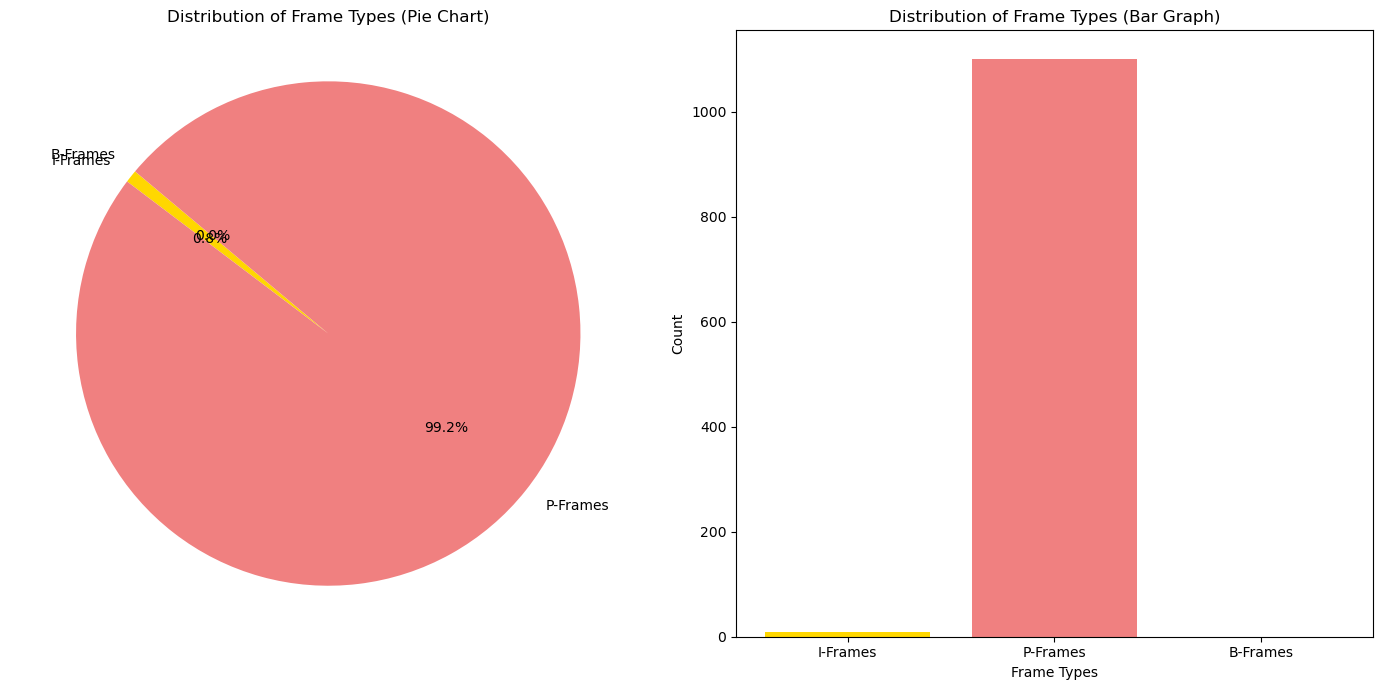

In [57]:
import ffmpeg
import matplotlib.pyplot as plt

def count_frames(video_path):
    # Run ffmpeg command to get frame types
    result = ffmpeg.probe(video_path, select_streams='v', show_frames=None)
    frames = result['frames']

    # Initialize counters
    i_frames = 0
    p_frames = 0
    b_frames = 0

    # Count frames
    for frame in frames:
        if frame['pict_type'] == 'I':
            i_frames += 1
        elif frame['pict_type'] == 'P':
            p_frames += 1
        elif frame['pict_type'] == 'B':
            b_frames += 1

    # Calculate total frames and percentages
    total_frames = i_frames + p_frames + b_frames
    i_percentage = (i_frames / total_frames) * 100
    p_percentage = (p_frames / total_frames) * 100
    b_percentage = (b_frames / total_frames) * 100

    return {
        'I_frames': i_frames,
        'P_frames': p_frames,
        'B_frames': b_frames,
        'I_percentage': i_percentage,
        'P_percentage': p_percentage,
        'B_percentage': b_percentage
    }

def plot_frame_distribution(frame_info):
    # Data for plotting
    labels = ['I-Frames', 'P-Frames', 'B-Frames']
    sizes = [frame_info['I_frames'], frame_info['P_frames'], frame_info['B_frames']]
    percentages = [frame_info['I_percentage'], frame_info['P_percentage'], frame_info['B_percentage']]
    colors = ['gold', 'lightcoral', 'lightskyblue']

    # Plot Pie Chart
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of Frame Types (Pie Chart)')

    # Plot Bar Graph
    plt.subplot(1, 2, 2)
    plt.bar(labels, sizes, color=colors)
    plt.title('Distribution of Frame Types (Bar Graph)')
    plt.xlabel('Frame Types')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Path to your video file
video_path = r"D:\college - sem 7\iva\videoplayback.mp4"

# Get frame count and percentages
frame_info = count_frames(video_path)

# Plot the frame distribution
plot_frame_distribution(frame_info)

# Lab Task 3: Visualizing Frames

### **Objective**: Extract actual frames from the video and display them using Python.

### Steps:
#### 1.	Extract Frames:
#### o	Use ffmpeg to extract individual I, P, and B frames from the video.
#### o	Save these frames as image files.

In [61]:
import subprocess
import os

def extract_frames(video_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # FFmpeg command to extract frames
    cmd_i = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,I)', '-vsync', 'vfr',
        os.path.join(output_dir, 'I_frame_%04d.png')
    ]
    cmd_p = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,P)', '-vsync', 'vfr',
        os.path.join(output_dir, 'P_frame_%04d.png')
    ]
    cmd_b = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,B)', '-vsync', 'vfr',
        os.path.join(output_dir, 'B_frame_%04d.png')
    ]

    # Execute FFmpeg commands
    subprocess.run(cmd_i)
    subprocess.run(cmd_p)
    subprocess.run(cmd_b)

# Path to your video file
video_path = r"D:\college - sem 7\iva\videoplayback.mp4"
# Directory where extracted frames will be saved
output_dir = r"D:\college - sem 7\iva\ivv"

# Extract frames
extract_frames(video_path, output_dir)

#### 2.	Display Frames:
#### o	Use a library like PIL (Pillow) or opencv-python to display the extracted frames.
#### Tasks:
#### 1. Save I, P, and B frames as separate image files using ffmpeg.
#### 2. Use PIL or opencv-python to load and display these frames in a Python script.
#### 3. Compare the visual quality of I, P, and B frames..
s.


In [72]:
import subprocess
import os
from PIL import Image
import cv2
import glob

def extract_frames(video_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # FFmpeg command to extract frames
    cmd_i = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,I)', '-vsync', 'vfr',
        os.path.join(output_dir, 'I_frame_%04d.png')
    ]
    cmd_p = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,P)', '-vsync', 'vfr',
        os.path.join(output_dir, 'P_frame_%04d.png')
    ]
    cmd_b = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,B)', '-vsync', 'vfr',
        os.path.join(output_dir, 'B_frame_%04d.png')
    ]

    # Execute FFmpeg commands
    subprocess.run(cmd_i)
    subprocess.run(cmd_p)
    subprocess.run(cmd_b)

def display_frames(output_dir, frame_type):
    # Find all frame files
    frame_files = sorted(glob.glob(os.path.join(output_dir, f'{frame_type}_frame_*.png')))

    for frame_file in frame_files:
        # Load and display frame using OpenCV
        img = cv2.imread(frame_file)
        cv2.imshow(f'{frame_type} Frame', img)
        cv2.waitKey(500)  # Display each frame for 500 milliseconds

    cv2.destroyAllWindows()

# Path to your video file
video_path = r"D:\college - sem 7\iva\videoplayback.mp4"
# Directory where extracted frames will be saved
output_dir = r"D:\college - sem 7\iva\ivv"

# Extract frames
extract_frames(video_path, output_dir)

# Display extracted frames
display_frames(output_dir, 'I')
display_frames(output_dir, 'P')
display_frames(output_dir, 'B')

# Lab Task 4: Frame Compression Analysis

### **Objective**: Analyze the compression efficiency of I, P, and B frames.

### Steps:
#### 1.	Calculate Frame Sizes:
#### o	Calculate the file sizes of extracted I, P, and B frames.
#### o	Compare the average file sizes of each frame type.

In [65]:
import subprocess
import os
import glob
import cv2
import numpy as np

def extract_frames(video_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # FFmpeg command to extract frames
    cmd_i = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,I)', '-vsync', 'vfr',
        os.path.join(output_dir, 'I_frame_%04d.png')
    ]
    cmd_p = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,P)', '-vsync', 'vfr',
        os.path.join(output_dir, 'P_frame_%04d.png')
    ]
    cmd_b = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,B)', '-vsync', 'vfr',
        os.path.join(output_dir, 'B_frame_%04d.png')
    ]

    # Execute FFmpeg commands
    subprocess.run(cmd_i)
    subprocess.run(cmd_p)
    subprocess.run(cmd_b)

def get_frame_file_sizes(output_dir, frame_type):
    # Find all frame files
    frame_files = sorted(glob.glob(os.path.join(output_dir, f'{frame_type}_frame_*.png')))
    file_sizes = []

    for frame_file in frame_files:
        # Get the file size in bytes
        file_size = os.path.getsize(frame_file)
        file_sizes.append(file_size)

    return file_sizes

def display_frames(output_dir, frame_type):
    # Find all frame files
    frame_files = sorted(glob.glob(os.path.join(output_dir, f'{frame_type}_frame_*.png')))

    for frame_file in frame_files:
        # Load and display frame using OpenCV
        img = cv2.imread(frame_file)
        cv2.imshow(f'{frame_type} Frame', img)
        cv2.waitKey(500)  # Display each frame for 500 milliseconds

    cv2.destroyAllWindows()

def calculate_average_size(file_sizes):
    if file_sizes:
        return sum(file_sizes) / len(file_sizes)
    return 0

# Path to your video file
video_path = r"D:\college - sem 7\iva\videoplayback.mp4"
# Directory where extracted frames will be saved
output_dir = r"D:\college - sem 7\iva\ivv"

# Extract frames
extract_frames(video_path, output_dir)

# Get file sizes
i_frame_sizes = get_frame_file_sizes(output_dir, 'I')
p_frame_sizes = get_frame_file_sizes(output_dir, 'P')
b_frame_sizes = get_frame_file_sizes(output_dir, 'B')

# Calculate average sizes
average_i_size = calculate_average_size(i_frame_sizes)
average_p_size = calculate_average_size(p_frame_sizes)
average_b_size = calculate_average_size(b_frame_sizes)

# Print the average sizes
print(f'Average I-frame size: {average_i_size} bytes')
print(f'Average P-frame size: {average_p_size} bytes')
print(f'Average B-frame size: {average_b_size} bytes')

# Display extracted frames (Optional)
display_frames(output_dir, 'I')
display_frames(output_dir, 'P')
display_frames(output_dir, 'B')


Average I-frame size: 296084.8888888889 bytes
Average P-frame size: 416751.63181818184 bytes
Average B-frame size: 0 bytes


# Lab Task 5: Advanced Frame Extraction

### **Objective**: Extract frames from a video and reconstruct a part of the video using only I frames.

### Steps:
#### 1.	Extract and Save I Frames:
#### o	Extract I frames from the video and save them as separate image files.

In [67]:
import subprocess
import os

def extract_i_frames(video_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # FFmpeg command to extract I-frames
    cmd = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,I)', '-vsync', 'vfr',
        os.path.join(output_dir, 'I_frame_%04d.png')
    ]

    # Execute FFmpeg command
    subprocess.run(cmd)

# Path to your video file
video_path = r"D:\college - sem 7\iva\videoplayback.mp4"
# Directory where extracted frames will be saved
output_dir = r"D:\college - sem 7\iva\ivv\i-frames"

# Extract I-frames
extract_i_frames(video_path, output_dir)

#### 2.	Reconstruct Video:
#### o Use the extracted I frames to reconstruct a portion of the video.
#### o Create a new video using these I frames with a reduced frame rate.

In [69]:
import subprocess
import os

def extract_i_frames(video_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # FFmpeg command to extract I-frames
    cmd = [
        'ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\\,I)', '-vsync', 'vfr',
        os.path.join(output_dir, 'I_frame_%04d.png')
    ]

    # Execute FFmpeg command
    subprocess.run(cmd)

def reconstruct_video_from_i_frames(output_dir, output_video_path, frame_rate=1):
    # FFmpeg command to create a video from extracted I-frames
    cmd = [
        'ffmpeg', '-framerate', str(frame_rate), '-i',
        os.path.join(output_dir, 'I_frame_%04d.png'), '-c:v', 'libx264',
        '-pix_fmt', 'yuv420p', output_video_path
    ]

    # Execute FFmpeg command
    subprocess.run(cmd)

# Path to your video file
video_path = r"D:\college - sem 7\iva\videoplayback.mp4"
# Directory where extracted frames will be saved
output_dir = r"D:\college - sem 7\iva\ivv\i-frames"
# Path for the reconstructed video
output_video_path = r"D:\college - sem 7\iva\ivv\i-frames\video.mp4"
# Desired frame rate for the reconstructed video
frame_rate = 1  # Adjust the frame rate as needed

# Extract I-frames
extract_i_frames(video_path, output_dir)

# Reconstruct video from I-frames
reconstruct_video_from_i_frames(output_dir, output_video_path, frame_rate)